# HR Analytics

### Problem Statement

A large company named XYZ, employs, at any given point of time, around 1470 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

* The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners.
* A sizeable department has to be maintained, for the purposes of recruiting new talent.
* More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company.

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

**Goal of the case study**

You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")

#### Importing Dataset

In [2]:
df=pd.read_csv('HR Employee.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()        ## NO null Values in this dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.duplicated().sum()    ## NO duplicate records

0

In [8]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


We can drop the features with just 1 unique value and the **EmployeeNumber** column.

In [10]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

In [11]:
df.shape

(1470, 31)

In [12]:
## Remaining Features
df.columns 

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

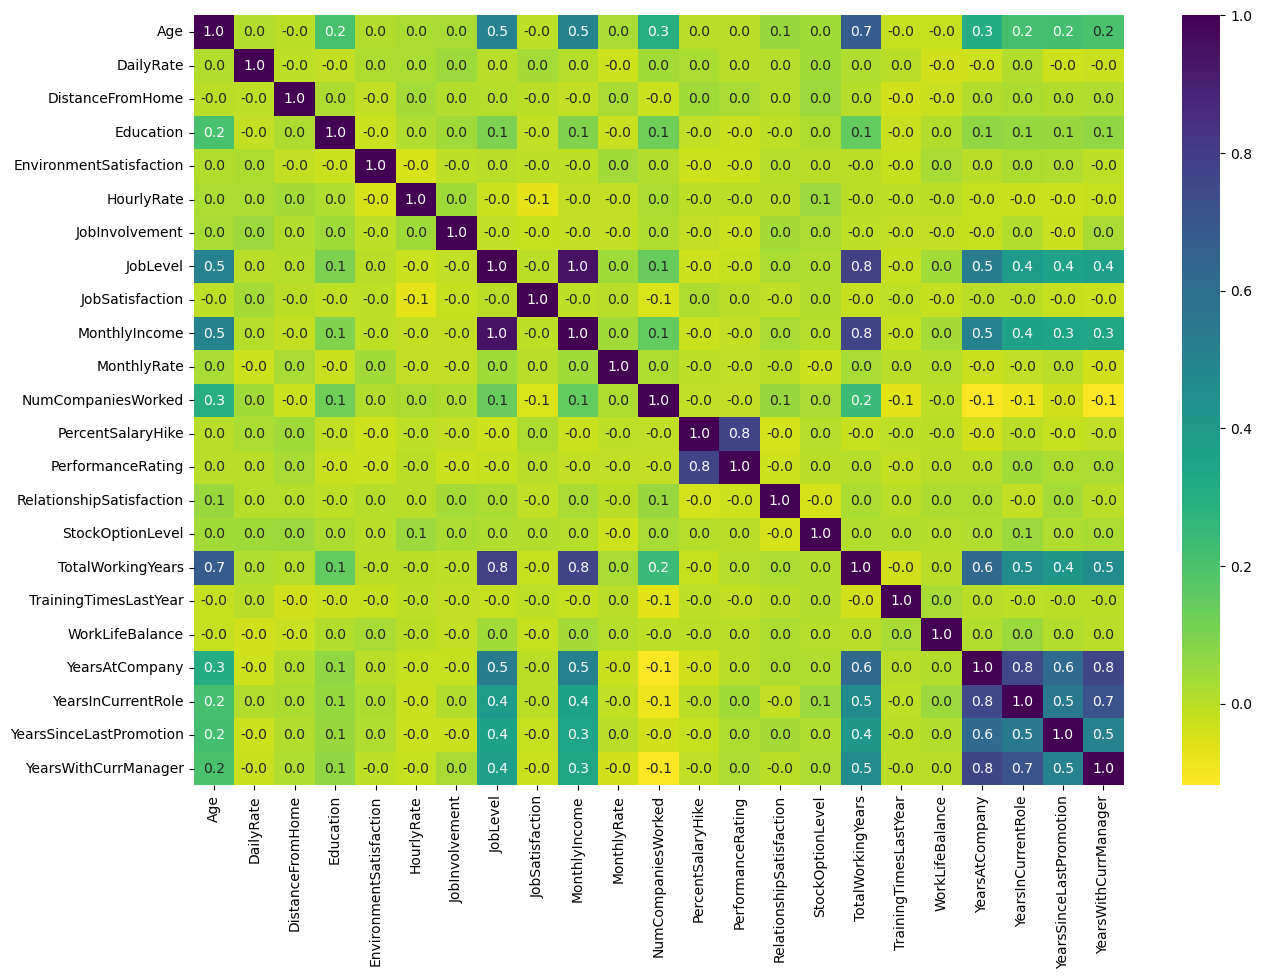

In [13]:
df_corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot = True,cmap ="viridis_r",fmt='.1f')
plt.show()

From the heatmap we saw that some features are highly correlated with other features.So we have to do the feature selection by which we can prevent our model from multicollinearity.

In [14]:
df.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

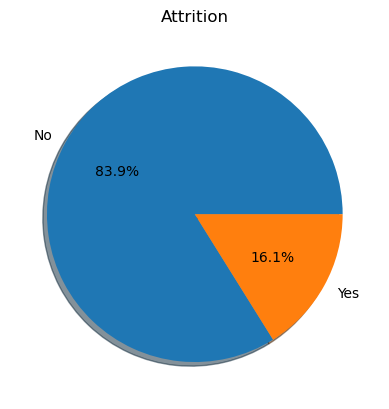

In [15]:
## Total % of Yes/No in the dataset. 
plt.pie(df['Attrition'].value_counts(), labels=('No' , 'Yes') , colors=["#1f77b4", "#ff7f0e"],shadow=True,autopct='%1.1f%%')
plt.title("Attrition")
plt.show()

It seems like imbalanced data. So, we will apply smote technique to balance the data after analyzing the dataset.

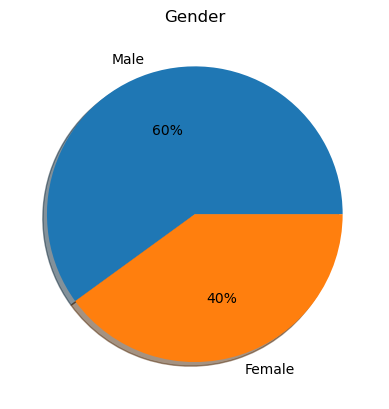

In [16]:
## Total % of Male/Female in the dataset.
plt.pie(df['Gender'].value_counts(),labels=('Male' , 'Female') , colors=["#1f77b4", "#ff7f0e"],shadow=True,autopct='%.0f%%')
plt.title("Gender")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

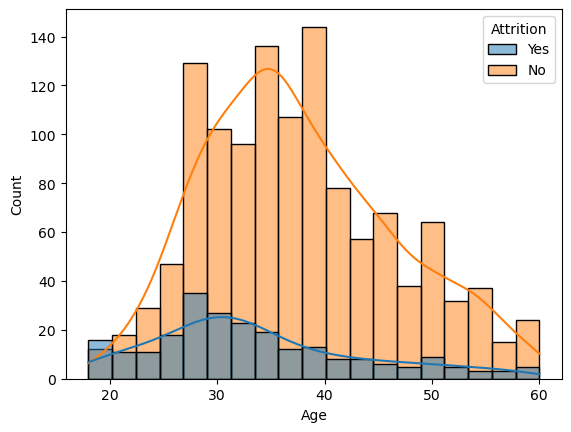

In [17]:
sns.histplot(data=df, x='Age', hue='Attrition' ,kde='True')

The majority of employee are between 28 - 36 years old, while the range of age are 18 - 60 the Company seems to be highly depended on segment of employees younger than 40 years old.

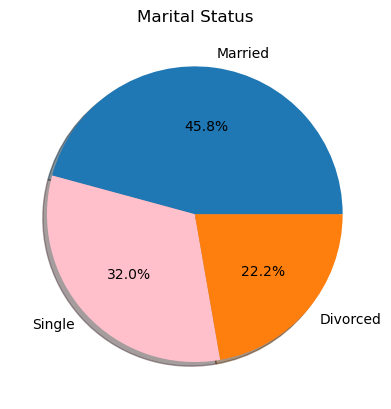

In [18]:
plt.pie(df['MaritalStatus'].value_counts() ,labels=[ 'Married','Single', 'Divorced'],colors=["#1f77b4",'#FFC0CB', "#ff7f0e"],shadow=True,autopct='%1.1f%%')
plt.title("Marital Status")
plt.show()

### Numerical Variables

In [19]:
num_feature=[feature for feature in df.columns if df[feature].dtypes!='O' and df[feature].nunique() > 5 ]
print("Total Numerical feature : ", len(num_feature))
num_feature

Total Numerical feature :  14


['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

### Outliers

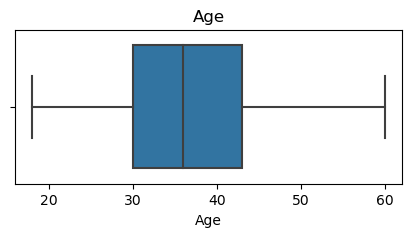

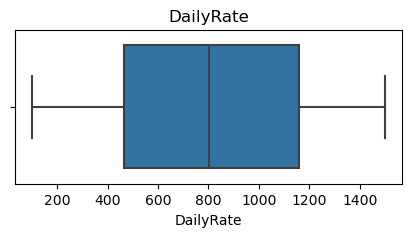

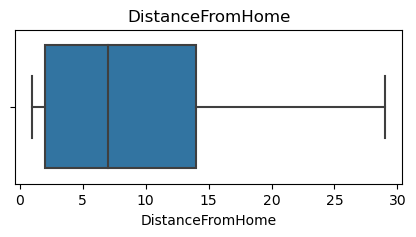

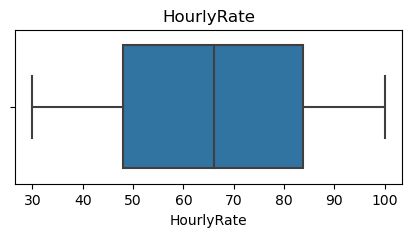

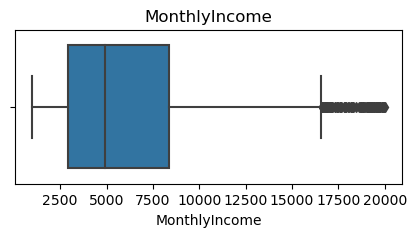

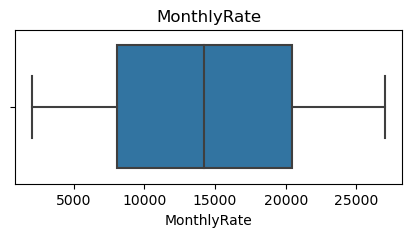

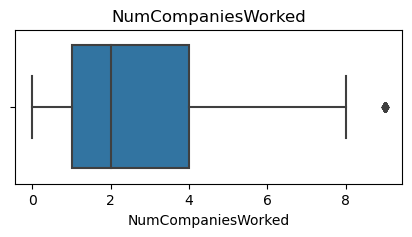

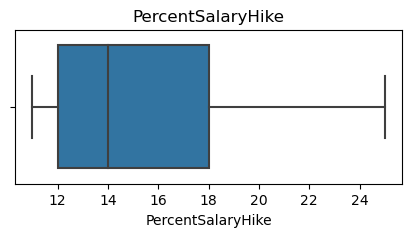

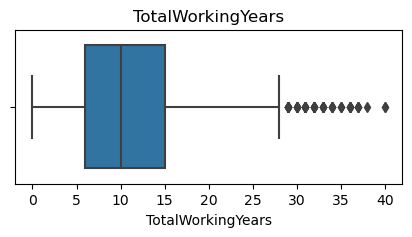

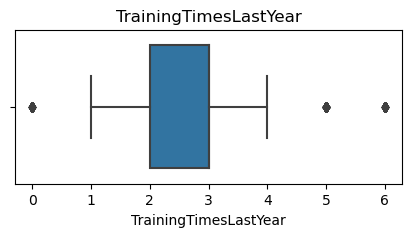

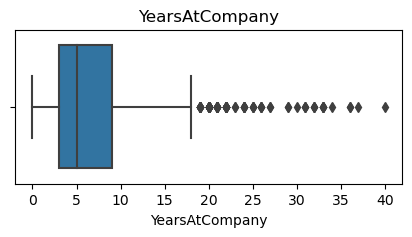

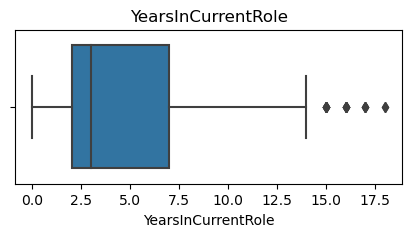

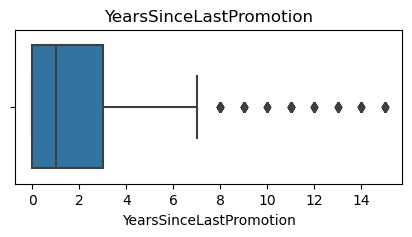

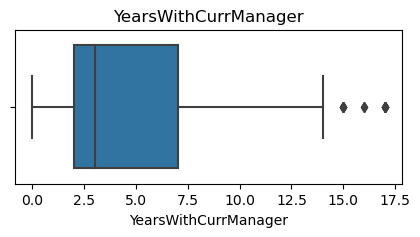

In [20]:
for feature in num_feature:
    plt.figure(figsize=(5,2))
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()

### Categorical Features

In [21]:
cat_feature=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Total Categorical Features : ' , len(cat_feature))
cat_feature

Total Categorical Features :  8


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

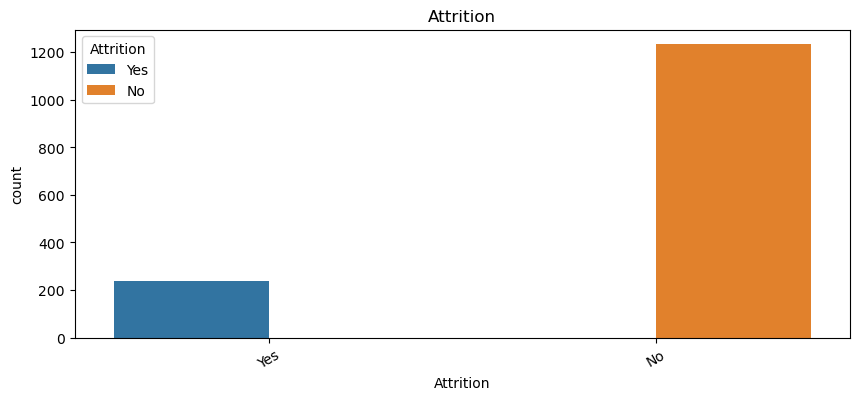

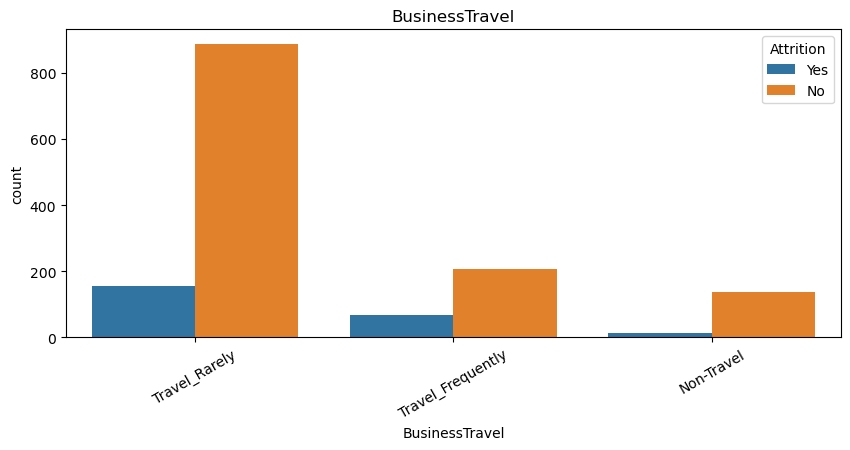

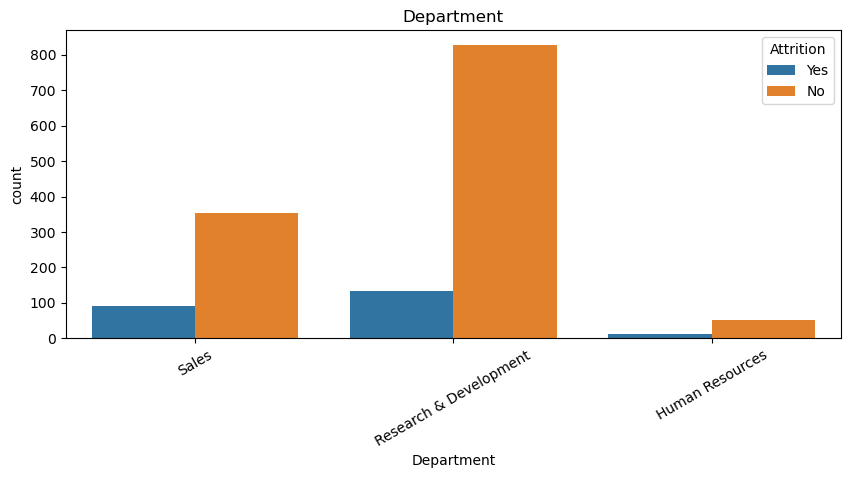

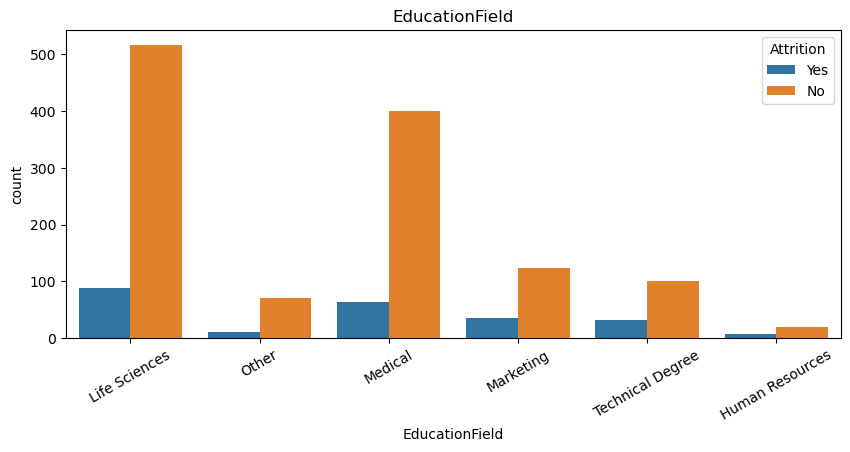

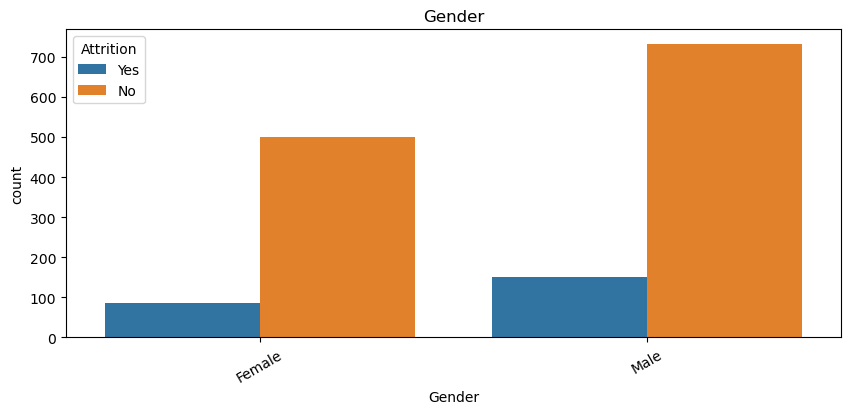

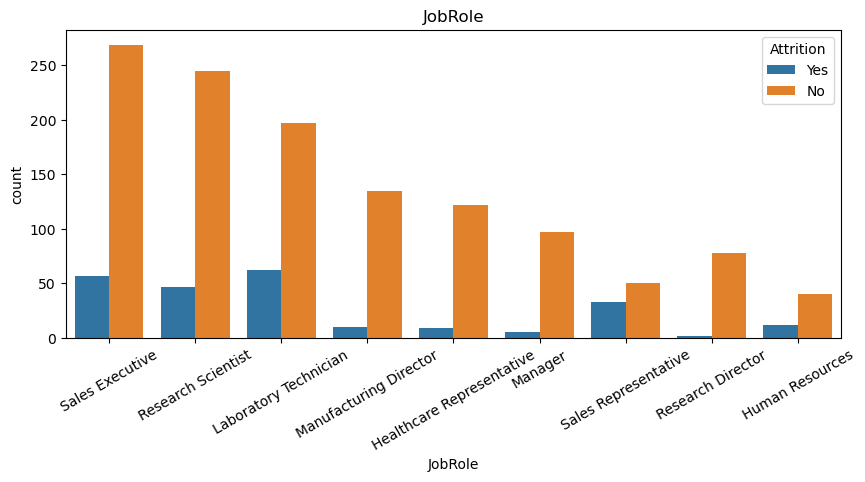

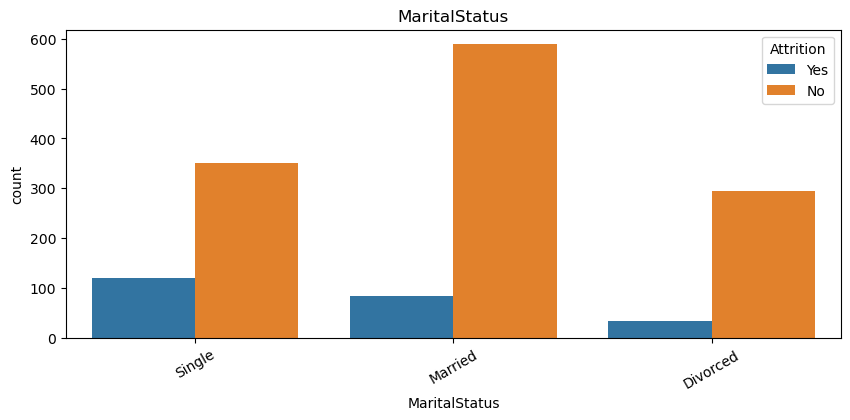

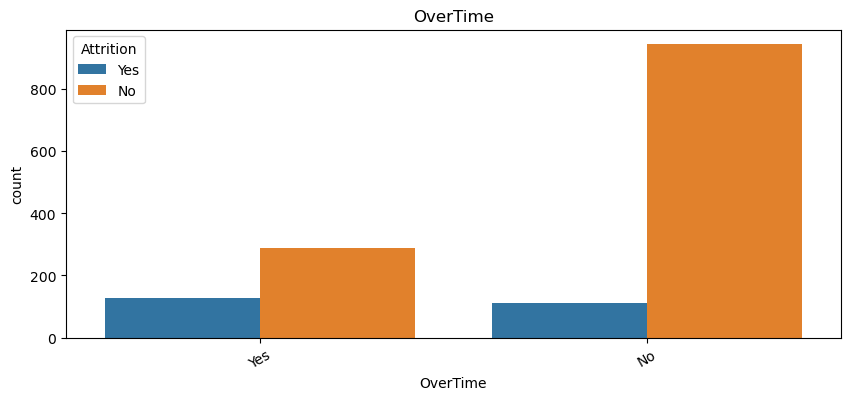

In [22]:
for feature in cat_feature:
    plt.figure(figsize=(10,4))
    sns.countplot(x=df[feature],hue=df['Attrition'])
    plt.xticks(rotation = 30)
    plt.title(feature)
    plt.show()

First we convert the categorical feature into numerical data type with the help of label encoding technique.

### Encode all the Categorical feature by LabelEncoder

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for feature in cat_feature:
    df[feature]=le.fit_transform(df[feature])

In [24]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [25]:
## Now all the values are of integer dtype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

### Feature Selection

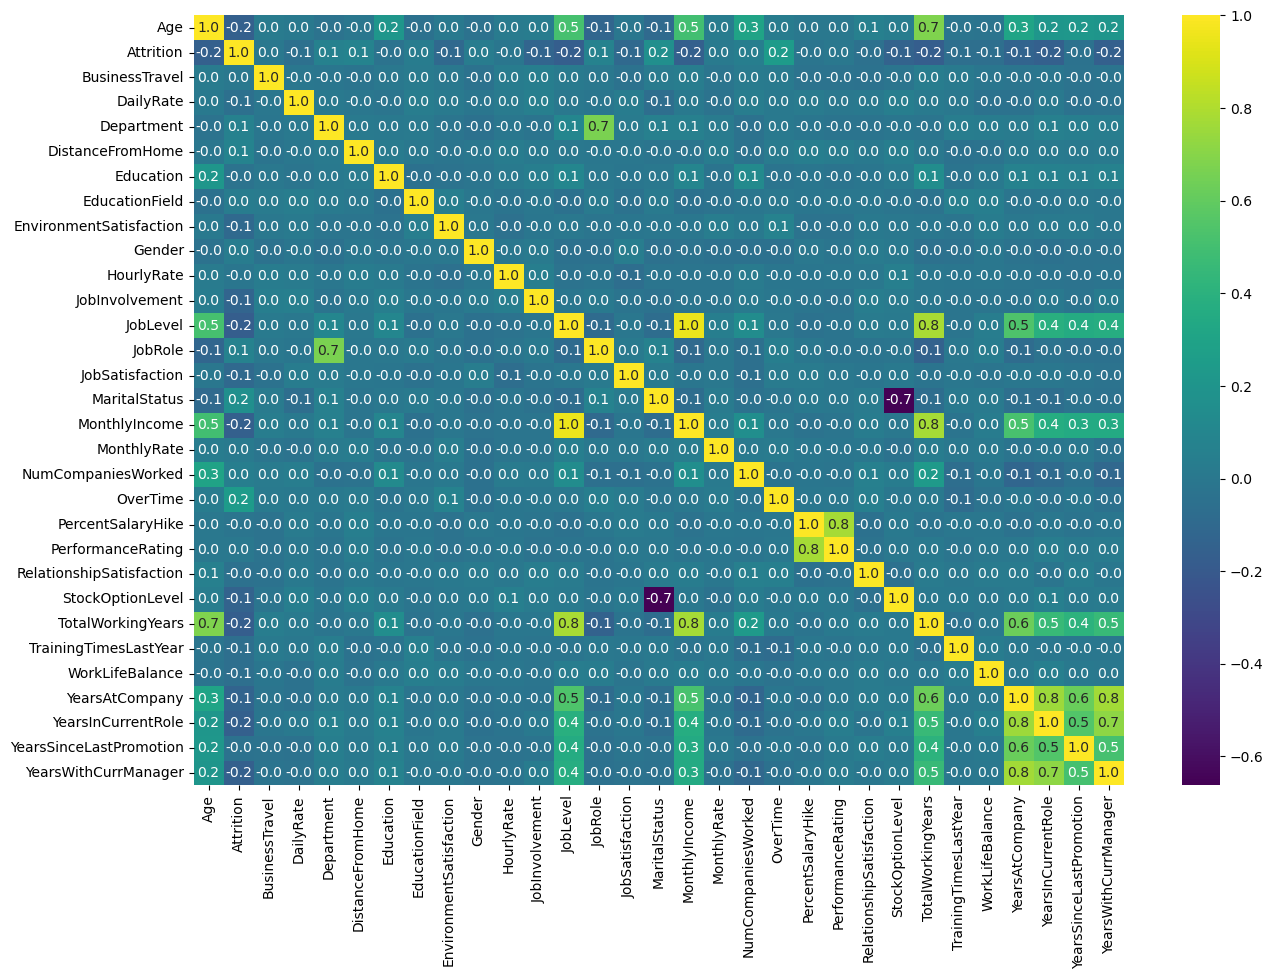

In [26]:
## Feature selection on the basis of correlation matrix and variance inflation factor(VIF).
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True,cmap ="viridis",fmt='1.01f')
plt.show()

In [27]:
df_uns=df_corr.unstack()
df_corr_val=df_uns.sort_values(kind="quicksort") 

In [28]:
df_corr_val[(df_corr_val) > 0.8 ]

MonthlyIncome             JobLevel                    0.9503
JobLevel                  MonthlyIncome               0.9503
Age                       Age                         1.0000
NumCompaniesWorked        NumCompaniesWorked          1.0000
YearsInCurrentRole        YearsInCurrentRole          1.0000
DailyRate                 DailyRate                   1.0000
DistanceFromHome          DistanceFromHome            1.0000
Education                 Education                   1.0000
EnvironmentSatisfaction   EnvironmentSatisfaction     1.0000
HourlyRate                HourlyRate                  1.0000
JobInvolvement            JobInvolvement              1.0000
JobLevel                  JobLevel                    1.0000
JobSatisfaction           JobSatisfaction             1.0000
YearsSinceLastPromotion   YearsSinceLastPromotion     1.0000
MonthlyIncome             MonthlyIncome               1.0000
PercentSalaryHike         PercentSalaryHike           1.0000
PerformanceRating       

We set a threshold value of a correlation matrix is 0.8. Above this value we will select those feature ( MonthlyIncome and JobLevel ) and then we select that feature who has low vif.

In [29]:
##importing vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
def cal_vif(dataset):
    vif=pd.DataFrame()
    vif['feature'] = dataset.columns
    vif['vif_value']= [variance_inflation_factor(dataset.values, i) for i in range (dataset.shape[1])]
    return(vif)

In [31]:
feature = df.drop(['Attrition'],axis=1)
cal_vif(feature)

,feature,vif_value
0,Age,33.303362
1,BusinessTravel,6.744873
2,DailyRate,4.973985
3,Department,12.973418
4,DistanceFromHome,2.317141
5,Education,9.453687
6,EducationField,3.866745
7,EnvironmentSatisfaction,7.109660
8,Gender,2.506220
9,HourlyRate,11.244053


As we have seen the vif of JobLevel is 52.565598 and MonthlyIncome is 32.084632 so we drop the Joblevel feature beacuse it has high vif and we will take low vif because if the vif is low that means it is not being explained by other vairables in a good way.

In [32]:
df=df.drop(['JobLevel'],axis=1)

In [33]:
df.shape

(1470, 30)

In [34]:
## Independent and Dependent Features
X=df.drop(['Attrition'],axis=1)
y=df["Attrition"]

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=43)

In [36]:
print("X_train ",X_train.shape)
print("X_test ",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train  (1176, 29)
X_test  (294, 29)
y_train (1176,)
y_test (294,)


### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

#### Applying Model

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [39]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)

print('Confusion Matrix : ' ,'\n',confusion_matrix(y_test,y_pred))
print('accuracy score:',accuracy_score(y_test, y_pred))
print('roc auc score:',roc_auc_score(y_test, y_pred))
print('Classification Report : ','\n',classification_report(y_test,y_pred))

Confusion Matrix :  
 [[226   6]
 [ 41  21]]
accuracy score: 0.8401360544217688
roc auc score: 0.6564238042269188
Classification Report :  
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       232
           1       0.78      0.34      0.47        62

    accuracy                           0.84       294
   macro avg       0.81      0.66      0.69       294
weighted avg       0.83      0.84      0.81       294



We have imbalanced dataset that's why we are getting this much accuracy. So, first we apply smote technique so that the imbalanced dataset gets converted into the balanced dataset.

### Smote Technique

In [40]:
from imblearn.over_sampling import SMOTE

print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)  
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 175
Before UpSampling, counts of label '0': 1001 

After UpSampling, counts of label '1': 1001
After UpSampling, counts of label '0': 1001 

After UpSampling, the shape of train_X: (2002, 29)
After UpSampling, the shape of train_y: (2002,) 



#### Applying mulptiple model to check the best model.

#### Logistic Regression

In [41]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
print('Confusion Matrix : ' ,'\n',confusion_matrix(y_test,y_predict))
print('accuracy score:',accuracy_score(y_test, y_predict))
print('roc auc score: ',roc_auc_score(y_test, y_predict))
print('Classification Report : ','\n',classification_report(y_test,y_predict))

Confusion Matrix :  
 [[173  59]
 [ 16  46]]
accuracy score: 0.7448979591836735
roc auc score:  0.7438125695216908
Classification Report :  
               precision    recall  f1-score   support

           0       0.92      0.75      0.82       232
           1       0.44      0.74      0.55        62

    accuracy                           0.74       294
   macro avg       0.68      0.74      0.69       294
weighted avg       0.81      0.74      0.76       294



**Random Forest Classifier**

In [42]:
from sklearn.ensemble import  RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train_res, y_train_res)
y_predict1 = model1.predict(X_test)
print('Confusion Matrix : ' ,'\n',confusion_matrix(y_test,y_predict1))
print('accuracy score:',accuracy_score(y_test, y_predict1))
print('roc auc score: ',roc_auc_score(y_test, y_predict1))
print('Classification Report : ','\n',classification_report(y_test,y_predict1))

Confusion Matrix :  
 [[225   7]
 [ 45  17]]
accuracy score: 0.8231292517006803
roc auc score:  0.6220105672969967
Classification Report :  
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       232
           1       0.71      0.27      0.40        62

    accuracy                           0.82       294
   macro avg       0.77      0.62      0.65       294
weighted avg       0.81      0.82      0.79       294



**Gradient Boosting Classifier**

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_res, y_train_res)
y_predict2 = gbc.predict(X_test)
print('Confusion Matrix : ' ,'\n',confusion_matrix(y_test,y_predict2))
print('accuracy score:',accuracy_score(y_test, y_predict2))
print('roc auc score: ',roc_auc_score(y_test, y_predict2))
print('Classification Report : ','\n',classification_report(y_test,y_predict2))

Confusion Matrix :  
 [[227   5]
 [ 43  19]]
accuracy score: 0.8367346938775511
roc auc score:  0.6424499443826474
Classification Report :  
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       232
           1       0.79      0.31      0.44        62

    accuracy                           0.84       294
   macro avg       0.82      0.64      0.67       294
weighted avg       0.83      0.84      0.81       294



**Gaussian Naive Bayes**

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train_res, y_train_res)
y_predict3=gnb.predict(X_test)
print('Confusion Matrix : ' ,'\n',confusion_matrix(y_test,y_predict3))
print('accuracy score:',accuracy_score(y_test, y_predict3))
print('roc auc score: ',roc_auc_score(y_test, y_predict3))
print('Classification Report : ','\n',classification_report(y_test,y_predict3))

Confusion Matrix :  
 [[143  89]
 [ 18  44]]
accuracy score: 0.6360544217687075
roc auc score:  0.6630283648498332
Classification Report :  
               precision    recall  f1-score   support

           0       0.89      0.62      0.73       232
           1       0.33      0.71      0.45        62

    accuracy                           0.64       294
   macro avg       0.61      0.66      0.59       294
weighted avg       0.77      0.64      0.67       294



**K Neighbors Classifier**

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(X_train_res, y_train_res)
y_predict4=knc.predict(X_test)
print('Confusion Matrix : ' ,'\n',confusion_matrix(y_test,y_predict4))
print('accuracy score:',accuracy_score(y_test, y_predict4))
print('roc auc score: ',roc_auc_score(y_test, y_predict4))
print('Classification Report : ','\n',classification_report(y_test,y_predict4))

Confusion Matrix :  
 [[152  80]
 [ 23  39]]
accuracy score: 0.6496598639455783
roc auc score:  0.6421023359288097
Classification Report :  
               precision    recall  f1-score   support

           0       0.87      0.66      0.75       232
           1       0.33      0.63      0.43        62

    accuracy                           0.65       294
   macro avg       0.60      0.64      0.59       294
weighted avg       0.75      0.65      0.68       294



**Decision Tree Classifier**

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train_res, y_train_res)
y_predict5=dtc.predict(X_test)
print('Confusion Matrix : ' ,'\n',confusion_matrix(y_test,y_predict5))
print('accuracy score:',accuracy_score(y_test, y_predict5))
print('roc auc score: ',roc_auc_score(y_test, y_predict5))
print('Classification Report : ','\n',classification_report(y_test,y_predict5))

Confusion Matrix :  
 [[198  34]
 [ 43  19]]
accuracy score: 0.7380952380952381
roc auc score:  0.5799499443826474
Classification Report :  
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       232
           1       0.36      0.31      0.33        62

    accuracy                           0.74       294
   macro avg       0.59      0.58      0.58       294
weighted avg       0.72      0.74      0.73       294



**AdaBoost Classifier**

In [47]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train_res, y_train_res)
y_predict7=abc.predict(X_test)
print('Confusion Matrix : ' ,'\n',confusion_matrix(y_test,y_predict7))
print('accuracy score:',accuracy_score(y_test, y_predict7))
print('roc auc score: ',roc_auc_score(y_test, y_predict7))
print('Classification Report : ','\n',classification_report(y_test,y_predict7))

Confusion Matrix :  
 [[204  28]
 [ 29  33]]
accuracy score: 0.8061224489795918
roc auc score:  0.7057842046718575
Classification Report :  
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       232
           1       0.54      0.53      0.54        62

    accuracy                           0.81       294
   macro avg       0.71      0.71      0.71       294
weighted avg       0.80      0.81      0.81       294



**XGBoost Classifier**

In [48]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train_res, y_train_res)
y_predict8=xgb.predict(X_test)
print('Confusion Matrix : ' ,'\n',confusion_matrix(y_test,y_predict8))
print('accuracy score:',accuracy_score(y_test, y_predict8))
print('roc auc score: ',roc_auc_score(y_test, y_predict8))
print('Classification Report : ','\n',classification_report(y_test,y_predict8))

Confusion Matrix :  
 [[223   9]
 [ 41  21]]
accuracy score: 0.8299319727891157
roc auc score:  0.6499582869855394
Classification Report :  
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       232
           1       0.70      0.34      0.46        62

    accuracy                           0.83       294
   macro avg       0.77      0.65      0.68       294
weighted avg       0.81      0.83      0.81       294



**Support Vector Classifier**

In [49]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train_res, y_train_res)
y_predict9=svc.predict(X_test)
print('Confusion Matrix : ' ,'\n',confusion_matrix(y_test,y_predict9))
print('accuracy score:',accuracy_score(y_test, y_predict9))
print('roc auc score: ',roc_auc_score(y_test, y_predict9))
print('Classification Report : ','\n',classification_report(y_test,y_predict9))

Confusion Matrix :  
 [[210  22]
 [ 34  28]]
accuracy score: 0.8095238095238095
roc auc score:  0.678392658509455
Classification Report :  
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       232
           1       0.56      0.45      0.50        62

    accuracy                           0.81       294
   macro avg       0.71      0.68      0.69       294
weighted avg       0.80      0.81      0.80       294



**We will consider AdaBoostClassifier and perform Hyper Parameter Tunning further to improve the accuracy of the model.**

### RandomizedSearchCV

**AdaBoostClassifier**

In [50]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train_res, y_train_res)
y_predict7=abc.predict(X_test)
print('Confusion Matrix : ' ,'\n',confusion_matrix(y_test,y_predict7))
print('accuracy score:',accuracy_score(y_test, y_predict7))
print('roc auc score: ',roc_auc_score(y_test, y_predict7))
print('Classification Report : ','\n',classification_report(y_test,y_predict7))

Confusion Matrix :  
 [[204  28]
 [ 29  33]]
accuracy score: 0.8061224489795918
roc auc score:  0.7057842046718575
Classification Report :  
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       232
           1       0.54      0.53      0.54        62

    accuracy                           0.81       294
   macro avg       0.71      0.71      0.71       294
weighted avg       0.80      0.81      0.81       294



In [51]:
from sklearn.model_selection import RandomizedSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


random_search = RandomizedSearchCV(estimator=AdaBoostClassifier(), param_distributions=grid,n_iter=100, n_jobs=-1, cv=10, scoring='accuracy',random_state=100)
# execute the grid search
random_result = random_search.fit(X_train_res, y_train_res)
# summarize the best score and configuration
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: 0.916274 using {'n_estimators': 500, 'learning_rate': 1.0, 'algorithm': 'SAMME'}


In [52]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators= 500, learning_rate= 1.0, algorithm= 'SAMME')
abc.fit(X_train_res, y_train_res)
y_predictp=abc.predict(X_test)
print('Confusion Matrix : ' ,'\n',confusion_matrix(y_test,y_predictp))
print('accuracy score:',accuracy_score(y_test, y_predictp))
print('roc auc score: ',roc_auc_score(y_test, y_predictp))
print('Classification Report : ','\n',classification_report(y_test,y_predictp))

Confusion Matrix :  
 [[211  21]
 [ 30  32]]
accuracy score: 0.826530612244898
roc auc score:  0.7128058954393771
Classification Report :  
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       232
           1       0.60      0.52      0.56        62

    accuracy                           0.83       294
   macro avg       0.74      0.71      0.72       294
weighted avg       0.82      0.83      0.82       294



**LogisticRegression**

In [53]:
model_lr = LogisticRegression()
model_lr.fit(X_train_res, y_train_res)
y_predict_lr = model.predict(X_test)
print('Confusion Matrix : ' ,'\n',confusion_matrix(y_test,y_predict_lr))
print('accuracy score:',accuracy_score(y_test, y_predict_lr))
print('roc auc score: ',roc_auc_score(y_test, y_predict_lr))
print('Classification Report : ','\n',classification_report(y_test,y_predict_lr))

Confusion Matrix :  
 [[173  59]
 [ 16  46]]
accuracy score: 0.7448979591836735
roc auc score:  0.7438125695216908
Classification Report :  
               precision    recall  f1-score   support

           0       0.92      0.75      0.82       232
           1       0.44      0.74      0.55        62

    accuracy                           0.74       294
   macro avg       0.68      0.74      0.69       294
weighted avg       0.81      0.74      0.76       294



In [54]:
grid_lr = dict()
grid_lr['penalty']=['l2', 'l1','elasticnet','none']
grid_lr['solver']= ['lbfgs', 'liblinear', 'newton-cg','newton-cholesky', 'sag', 'saga']
grid_lr['multi_class']=['auto', 'ovr', 'multinomial']

random_lr_search = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=grid_lr,n_iter=100, n_jobs=-1, cv=10, scoring='accuracy',random_state=100)
# execute the grid search
random_lr_result = random_lr_search.fit(X_train_res, y_train_res)
# summarize the best score and configuration
print("Best: %f using %s" % (random_lr_result.best_score_, random_lr_result.best_params_))

Best: 0.774239 using {'solver': 'lbfgs', 'penalty': 'none', 'multi_class': 'auto'}


In [55]:
model = LogisticRegression(solver= 'lbfgs', penalty= 'none', multi_class= 'auto')
model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
print('Confusion Matrix : ' ,'\n',confusion_matrix(y_test,y_predict))
print('accuracy score:',accuracy_score(y_test, y_predict))
print('roc auc score: ',roc_auc_score(y_test, y_predict))
print('Classification Report : ','\n',classification_report(y_test,y_predict))

Confusion Matrix :  
 [[172  60]
 [ 16  46]]
accuracy score: 0.7414965986394558
roc auc score:  0.7416573971078977
Classification Report :  
               precision    recall  f1-score   support

           0       0.91      0.74      0.82       232
           1       0.43      0.74      0.55        62

    accuracy                           0.74       294
   macro avg       0.67      0.74      0.68       294
weighted avg       0.81      0.74      0.76       294



### GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV

grid1 = dict()
grid1['n_estimators'] = [10, 50, 100, 500]
grid1['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid1['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.880272 using {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 50}


In [57]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators= 50, learning_rate= 1.0, algorithm= 'SAMME.R')
abc.fit(X_train_res, y_train_res)
y_predictp=abc.predict(X_test)
print('Confusion Matrix : ' ,'\n',confusion_matrix(y_test,y_predictp))
print('accuracy score:',accuracy_score(y_test, y_predictp))
print('roc auc score: ',roc_auc_score(y_test, y_predictp))
print('Classification Report : ','\n',classification_report(y_test,y_predictp))

Confusion Matrix :  
 [[204  28]
 [ 29  33]]
accuracy score: 0.8061224489795918
roc auc score:  0.7057842046718575
Classification Report :  
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       232
           1       0.54      0.53      0.54        62

    accuracy                           0.81       294
   macro avg       0.71      0.71      0.71       294
weighted avg       0.80      0.81      0.81       294

